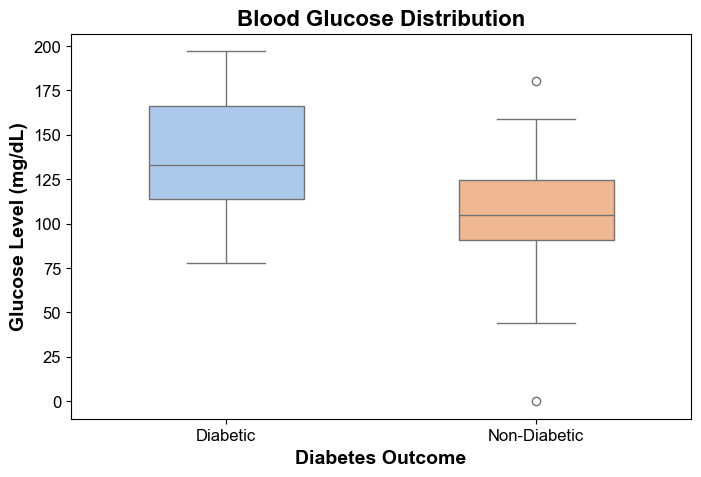

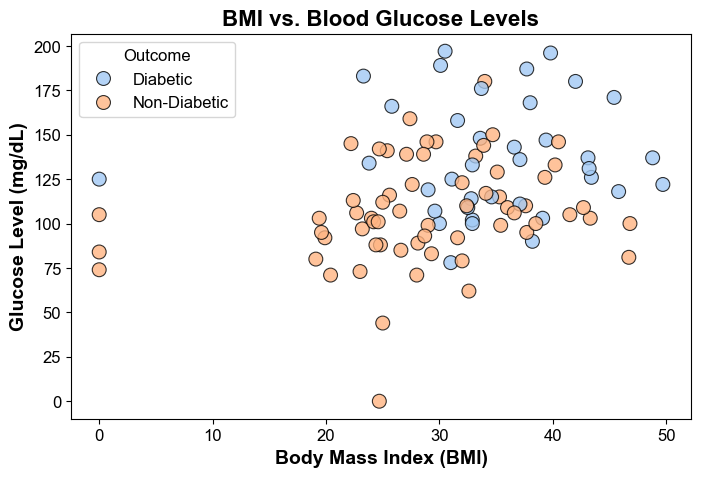

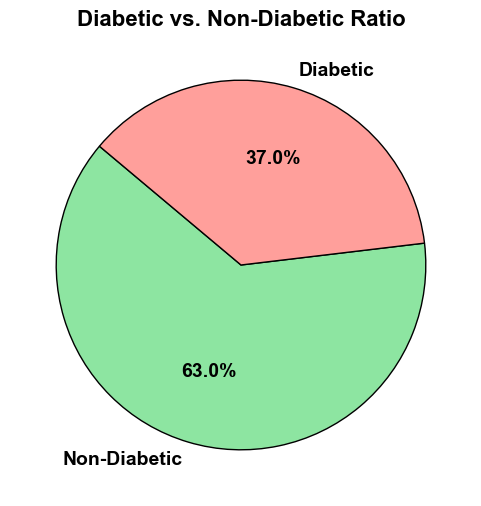

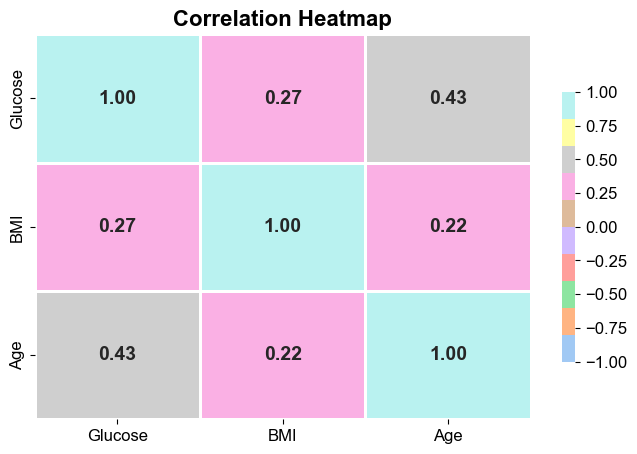

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("diabetes.csv")
df = df.head(100)  # Select the first 100 rows
df = df[["Glucose", "BMI", "Age", "Outcome"]]  # Select key columns
df["Outcome"] = df["Outcome"].map({0: "Non-Diabetic", 1: "Diabetic"})  # Convert categorical labels

# Set global font style
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Define a unified color palette
color_palette = sns.color_palette("pastel", 4)  # Use pastel color palette

# 1. Box plot: Blood glucose distribution by diabetes status
plt.figure(figsize=(8, 5))
sns.boxplot(x="Outcome", y="Glucose", data=df, width=0.5, hue="Outcome", palette=[color_palette[0], color_palette[1]])
plt.title("Blood Glucose Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Diabetes Outcome", fontsize=14, fontweight="bold")
plt.ylabel("Glucose Level (mg/dL)", fontsize=14, fontweight="bold")
plt.show()

# 2. Scatter plot: BMI vs. Blood glucose levels
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="BMI", y="Glucose", hue="Outcome", data=df, s=100, alpha=0.8,
    palette=[color_palette[0], color_palette[1]], edgecolor="black"
)
plt.title("BMI vs. Blood Glucose Levels", fontsize=16, fontweight="bold")
plt.xlabel("Body Mass Index (BMI)", fontsize=14, fontweight="bold")
plt.ylabel("Glucose Level (mg/dL)", fontsize=14, fontweight="bold")
plt.legend(title="Outcome", loc="upper left", fontsize=12)
plt.show()

# 3. Pie chart: Proportion of diabetic vs. non-diabetic patients
plt.figure(figsize=(6, 6))
outcome_counts = df["Outcome"].value_counts()
plt.pie(
    outcome_counts,
    labels=outcome_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=[color_palette[2], color_palette[3]],  # Use different colors from the palette
    wedgeprops={"edgecolor": "black", "linewidth": 1},
    textprops={"fontsize": 14, "fontweight": "bold"}
)
plt.title("Diabetic vs. Non-Diabetic Ratio", fontsize=16, fontweight="bold")
plt.show()

# 4. Heatmap: Correlation between key variables
plt.figure(figsize=(8, 5))
corr = df[["Glucose", "BMI", "Age"]].corr()
sns.heatmap(
    corr,
    annot=True,
    cmap=sns.color_palette("pastel", as_cmap=True),  # Use the same color scheme
    fmt=".2f",
    linewidths=1,
    annot_kws={"size": 14, "weight": "bold"},
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.show()
